# Import required libraries


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
pd.set_option('display.max_rows', 999)
pd.set_option('max_colwidth', 40)
pd.set_option('display.max_columns', 50)
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
%matplotlib inline

# Read data from csv


In [0]:
df_walmartAnalysis = pd.read_csv('/content/drive/My Drive/DS Course Assessments/walmart_case_study/Walmart_Store_sales.csv')

In [4]:
# view shape and top 5 rows of data
print('There are {} records and {} features.'.format(df_walmartAnalysis.shape[0], df_walmartAnalysis.shape[1]))
df_walmartAnalysis.head()

There are 6435 records and 8 features.


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# see info of the data
# From info. we can see the data has no null values and all features are into their proper dtype.
# Date is an object converting it to DateTime
df_walmartAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [0]:
# Converting Date to DateTime from object.
# df_walmartAnalysis['Date'] = pd.to_datetime(df_walmartAnalysis['Date'])

In [7]:
# describing df_walmartAnalysis
# From here we can see that there are 45 walmart stores with weekly sales in the range of $2,01,000 to $38,18,686. 
# Min temperature being -2.06degC and Max being +100.14degC. Min. Fuel Price is $2.47 and Max. is $4.47.
# CPI is in the range of [126.06, 227.23] and Unemployment is in the range of [3.87, 14.31]

df_walmartAnalysis.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Which store with maximum sales?

In [8]:
# finding the store having maximum weekly sales

grpby_stores_sum = df_walmartAnalysis.groupby('Store')['Weekly_Sales'].sum()
print('Store {} has Max. Sales of ${}'.format(grpby_stores_sum.index[grpby_stores_sum == max(grpby_stores_sum)][0], max(grpby_stores_sum)))

Store 20 has Max. Sales of $301397792.46000004


#  Which store having maximum standard deviation? Also find coeficient of Mean to Std

In [9]:
grpby_stores_std = df_walmartAnalysis.groupby('Store')['Weekly_Sales'].std()
print('Store {} has Max. Standard Deviation of {}'.format(grpby_stores_std.index[grpby_stores_std == max(grpby_stores_std)][0], max(grpby_stores_std)))

Store 14 has Max. Standard Deviation of 317569.9494755081


In [10]:
mean_value = df_walmartAnalysis['Weekly_Sales'].mean()
std_value = df_walmartAnalysis['Weekly_Sales'].std()
print('Coefficient of Mean to Std: {}'.format(round(mean_value/std_value, 3)))

Coefficient of Mean to Std: 1.855


# Which store/s has good quarterly growth rate in Q3’2012?

In [11]:
# extracting Year from Date and adding as a new column in dataframe
# extracting Month from Date and adding as a new column in dataframe
df_walmartQ3Analysis = df_walmartAnalysis.copy()
df1 = pd.DataFrame(df_walmartQ3Analysis['Date'].str.split('-').tolist(), columns=['Day', 'Month', 'Year'])
df1 = df1.astype(dtype=int)

df_walmartQ3Analysis = pd.concat([df_walmartQ3Analysis, df1], axis=1)
df_walmartQ3Analysis['Qtr'] = 'Q' + pd.to_datetime(df_walmartQ3Analysis['Month'], format='%m').dt.quarter.astype(str)

df_walmartQ3Analysis.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Qtr
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,Q1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,Q1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Q1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Q1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,Q1


In [12]:
# extracting data for Q3 of 2012 i.e for the month of Aug, Sept and Oct ---- 7, 8, 9
growthRateQ3_2012= df_walmartQ3Analysis[(df_walmartQ3Analysis['Year'] == 2012) & (df_walmartQ3Analysis['Qtr'] == 'Q3')]
growthRateQ3_2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Qtr
126,1,06-07-2012,1769854.16,0,81.57,3.227,221.883779,6.908,6,7,2012,Q3
127,1,13-07-2012,1527014.04,0,77.12,3.256,221.924158,6.908,13,7,2012,Q3
128,1,20-07-2012,1497954.76,0,80.42,3.311,221.932727,6.908,20,7,2012,Q3
129,1,27-07-2012,1439123.71,0,82.66,3.407,221.941295,6.908,27,7,2012,Q3
130,1,03-08-2012,1631135.79,0,86.11,3.417,221.949864,6.908,3,8,2012,Q3


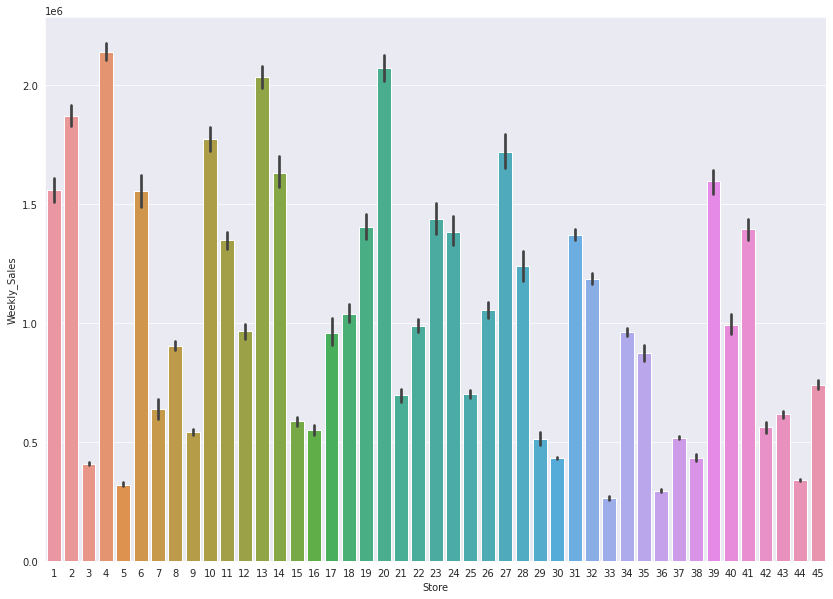

In [13]:
plt.figure(figsize=(14,10))
sns.barplot(x='Store', y='Weekly_Sales', data=growthRateQ3_2012)

# But from the plot below we can see that Store 4 procures highest growth rate in Q3 of 2012.

# Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [14]:
# From this data, we can derive that out of total sales, around 5985 i.e. 93% sales occurs on Non Holiday week and remaining ~7% sales occurs on Holiday week
total_week_sales = df_walmartAnalysis.groupby('Holiday_Flag')
total_week_sales.size()
total_week_sales['Weekly_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Holiday_Flag,,,,,,,,
0,5985.0,1.041256e+06,558957.436147,209986.25,551378.3900,956211.20,1414343.530,3818686.45
1,450.0,1.122888e+06,627684.931884,215359.21,575865.4825,1018538.04,1555213.175,3004702.33


In [15]:
# getting Non Holiday Sales

non_holiday_sales = total_week_sales.get_group(0)
print('Non Holiday Sales first 5 rows: \n')
non_holiday_sales.head()

Non Holiday Sales first 5 rows: 



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106


In [16]:
# getting Holiday Sales
holiday_sales = total_week_sales.get_group(1)
print('Holiday Sales first 5 rows: \n')
holiday_sales.head()

Holiday Sales first 5 rows: 



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742


In [17]:
mean_non_holiday_sales = non_holiday_sales['Weekly_Sales'].mean()
print(mean_non_holiday_sales)

1041256.3802088564


In [0]:
df_whichHolidaySales = holiday_sales[holiday_sales['Weekly_Sales'] > mean_non_holiday_sales]

In [19]:
# Here is the required holiday sales data. Out of 450 holiday records, 220 records are those where the sales is higher than the mean sales in non-holiday season for all stores together.
df_whichHolidaySales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
83,1,09-09-2011,1540471.24,1,76.00,3.546,215.861056,7.962
94,1,25-11-2011,2033320.66,1,60.14,3.236,218.467621,7.866
99,1,30-12-2011,1497462.72,1,44.55,3.129,219.535990,7.866
105,1,10-02-2012,1802477.43,1,48.02,3.409,220.265178,7.348
135,1,07-09-2012,1661767.33,1,83.96,3.730,222.439015,6.908


In [20]:
# Holiday weeks ..
df_whichHolidaySales[['Date']]

,Date
1,12-02-2010
31,10-09-2010
42,26-11-2010
47,31-12-2010
53,11-02-2011
83,09-09-2011
94,25-11-2011
99,30-12-2011
105,10-02-2012
135,07-09-2012


# Provide a monthly and semester view of sales in units and give insights

In [0]:
# extracting Month from Date and adding as a new column in dataframe
df_walmartSalesAnalysis = df_walmartAnalysis.copy()
df1 = pd.DataFrame(df_walmartSalesAnalysis['Date'].str.split('-').tolist(), columns=['Day', 'Month', 'Year'])
df1 = df1.astype(dtype=int)

df_walmartSalesAnalysis = pd.concat([df_walmartSalesAnalysis, df1], axis=1)


In [22]:
df_walmartSalesAnalysis.sort_values(by=['Store', 'Year'], inplace=True)
df_walmartSalesAnalysis.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106,12,3,2010
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106,19,3,2010
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106,26,3,2010
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808,2,4,2010
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808,9,4,2010


In [0]:
# Function to return monthwise Sales Growth Results

def month_wise_sales(year):
  all_stores = df_walmartSalesAnalysis['Store'].unique().tolist()
  number_of_columns= 4
  number_of_rows = len(all_stores)/(number_of_columns)
  fig=plt.figure(figsize=(5*number_of_columns, 5*number_of_rows+3))
  fig.suptitle('Sales Growth Result for Year {}'.format(year), fontsize=22, color='blue') 


  for i, store in enumerate(all_stores):
    all_months = df_walmartSalesAnalysis[(df_walmartSalesAnalysis['Year'] == year) & (df_walmartSalesAnalysis['Store'] == store)]['Month'].unique()
    salesGrowthRate_2010 = df_walmartSalesAnalysis[(df_walmartSalesAnalysis['Year'] == year) & ((df_walmartSalesAnalysis.Month.isin(all_months))) & (df_walmartSalesAnalysis['Store'] == store)]

    ax = plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    ax.set_title('Store {} Sales'.format(store), fontsize=14, pad=10, color='red') 
    sns.barplot(x='Month', y='Weekly_Sales', data=salesGrowthRate_2010, ax=ax)
    
  plt.tight_layout()
  fig.subplots_adjust(wspace=0.3, hspace=0.35, top=0.96, bottom=0.1)

  return ax


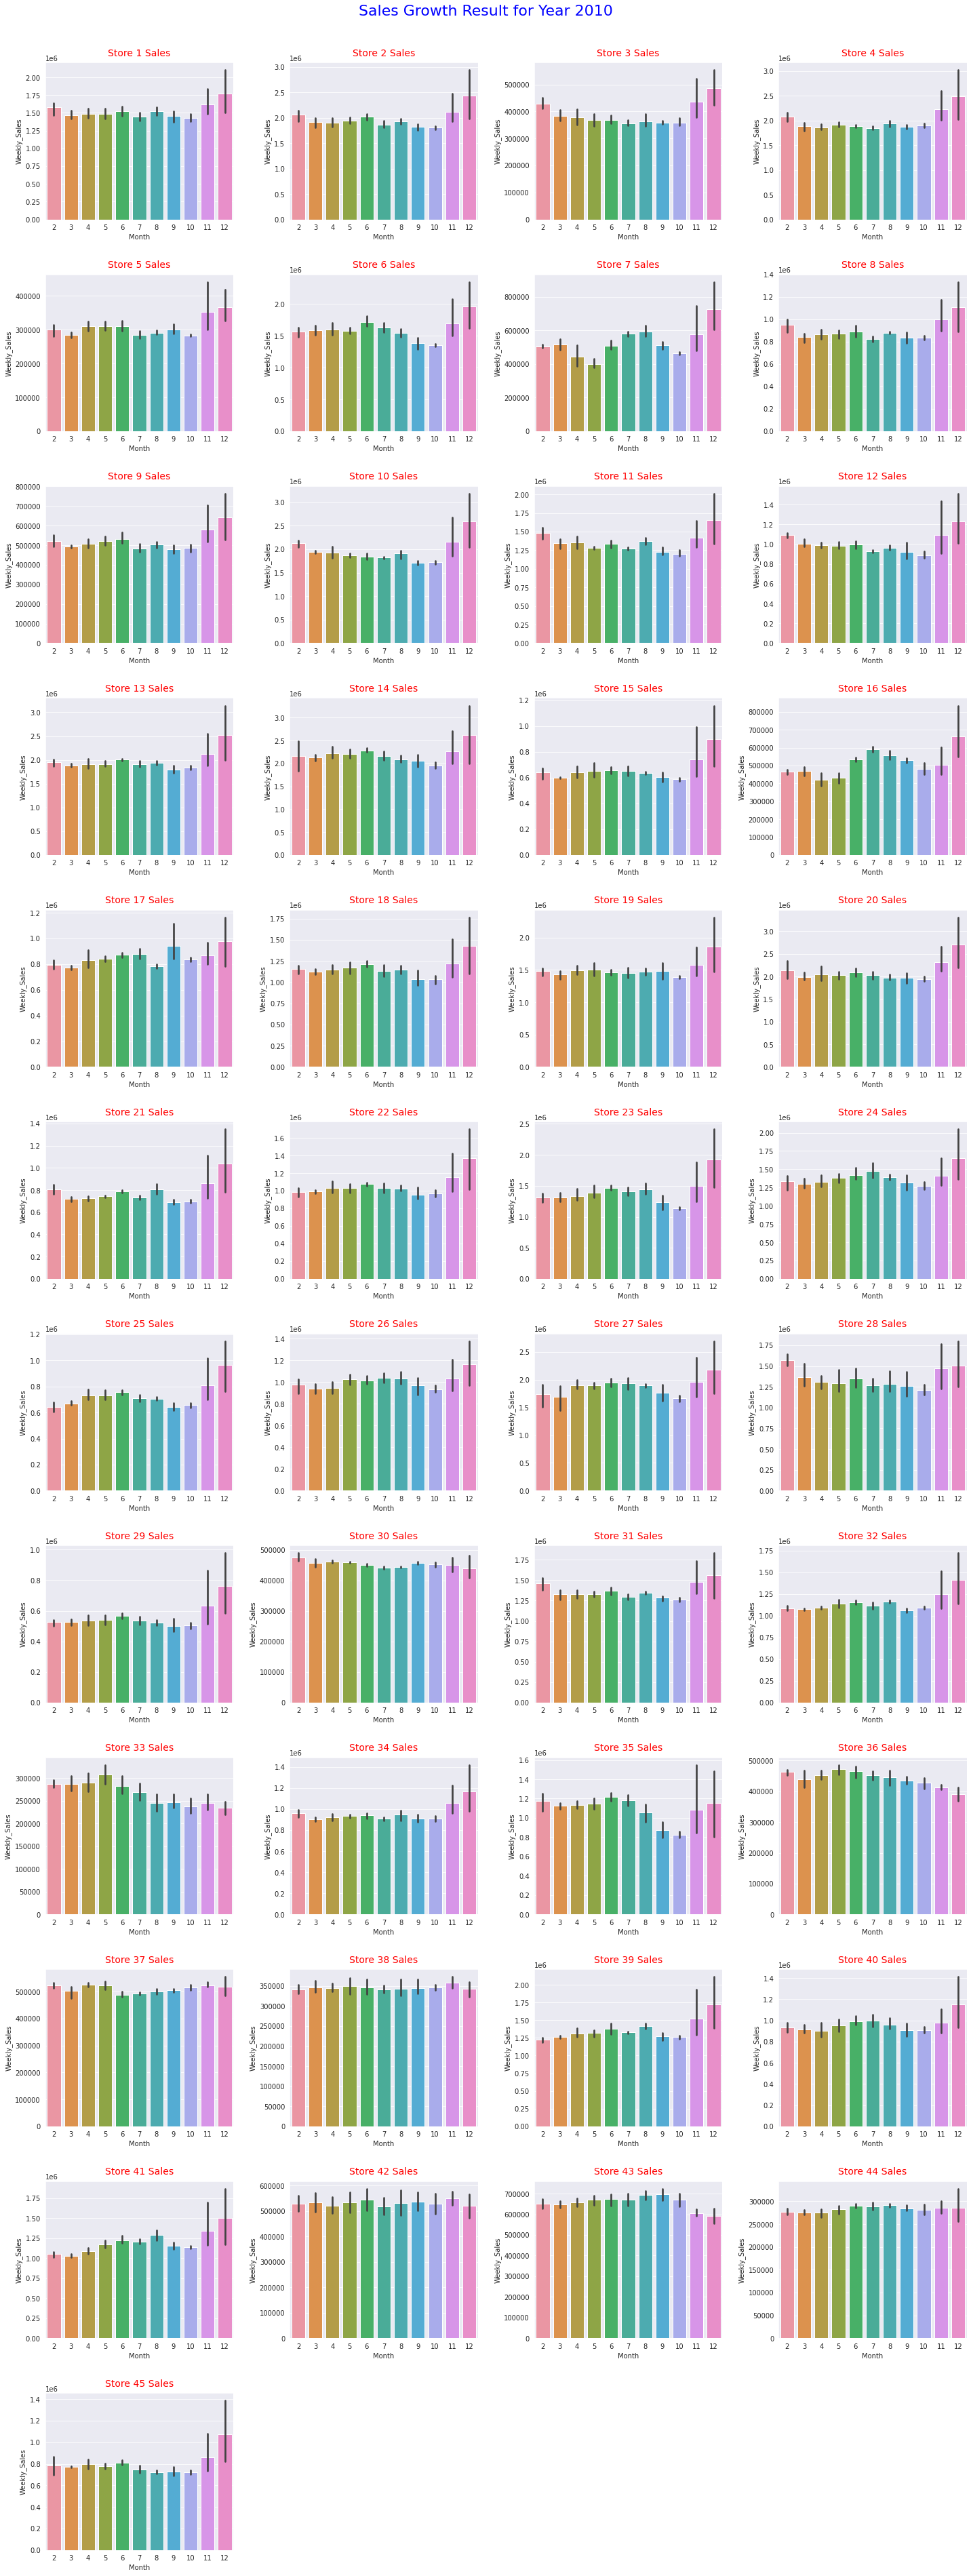

In [24]:
# Sales Growth Results for Year 2011

month_wise_sales(2010)

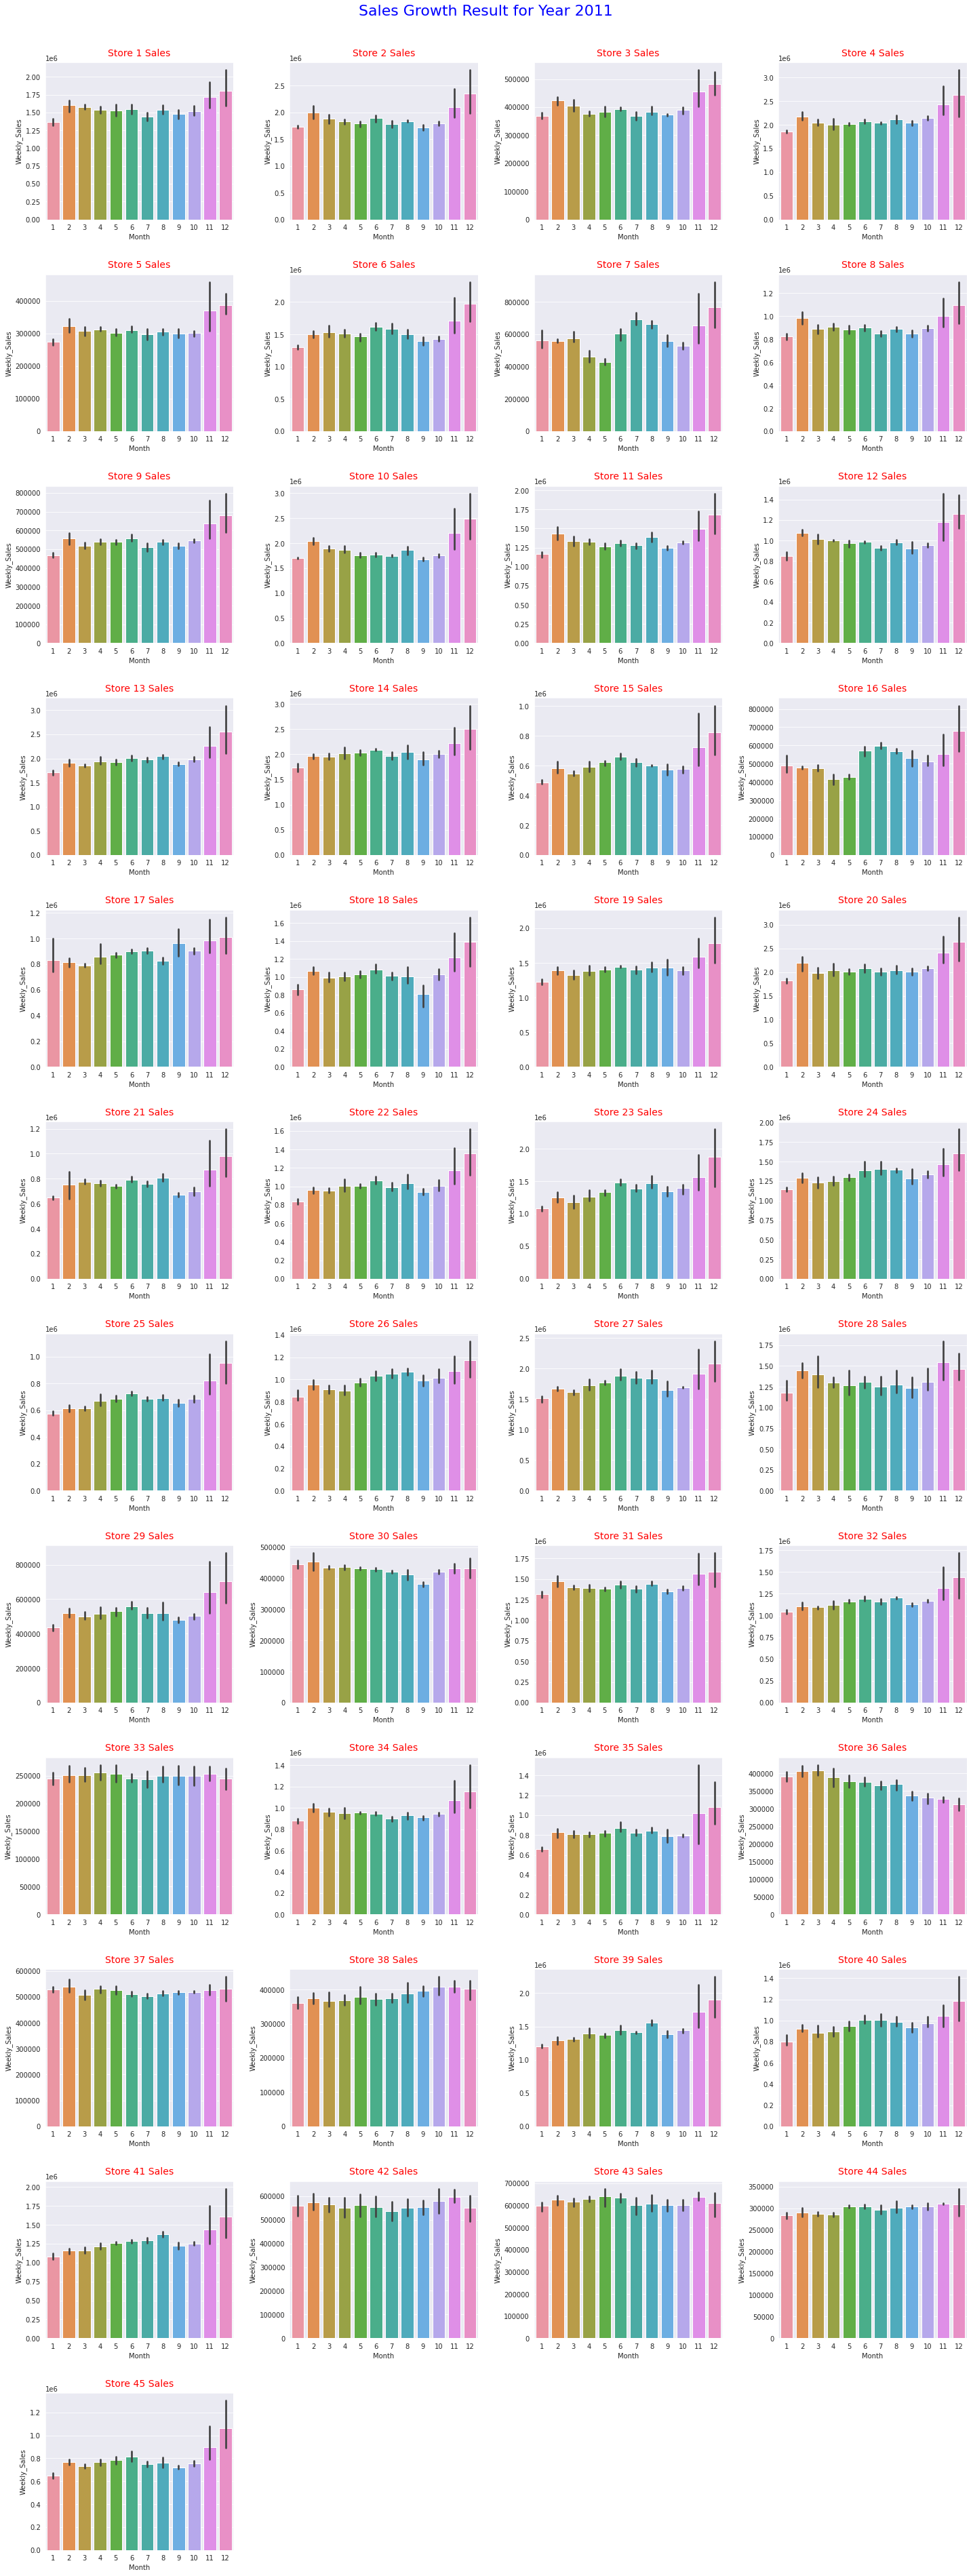

In [25]:
# Sales Growth Results for Year 2011

month_wise_sales(2011)

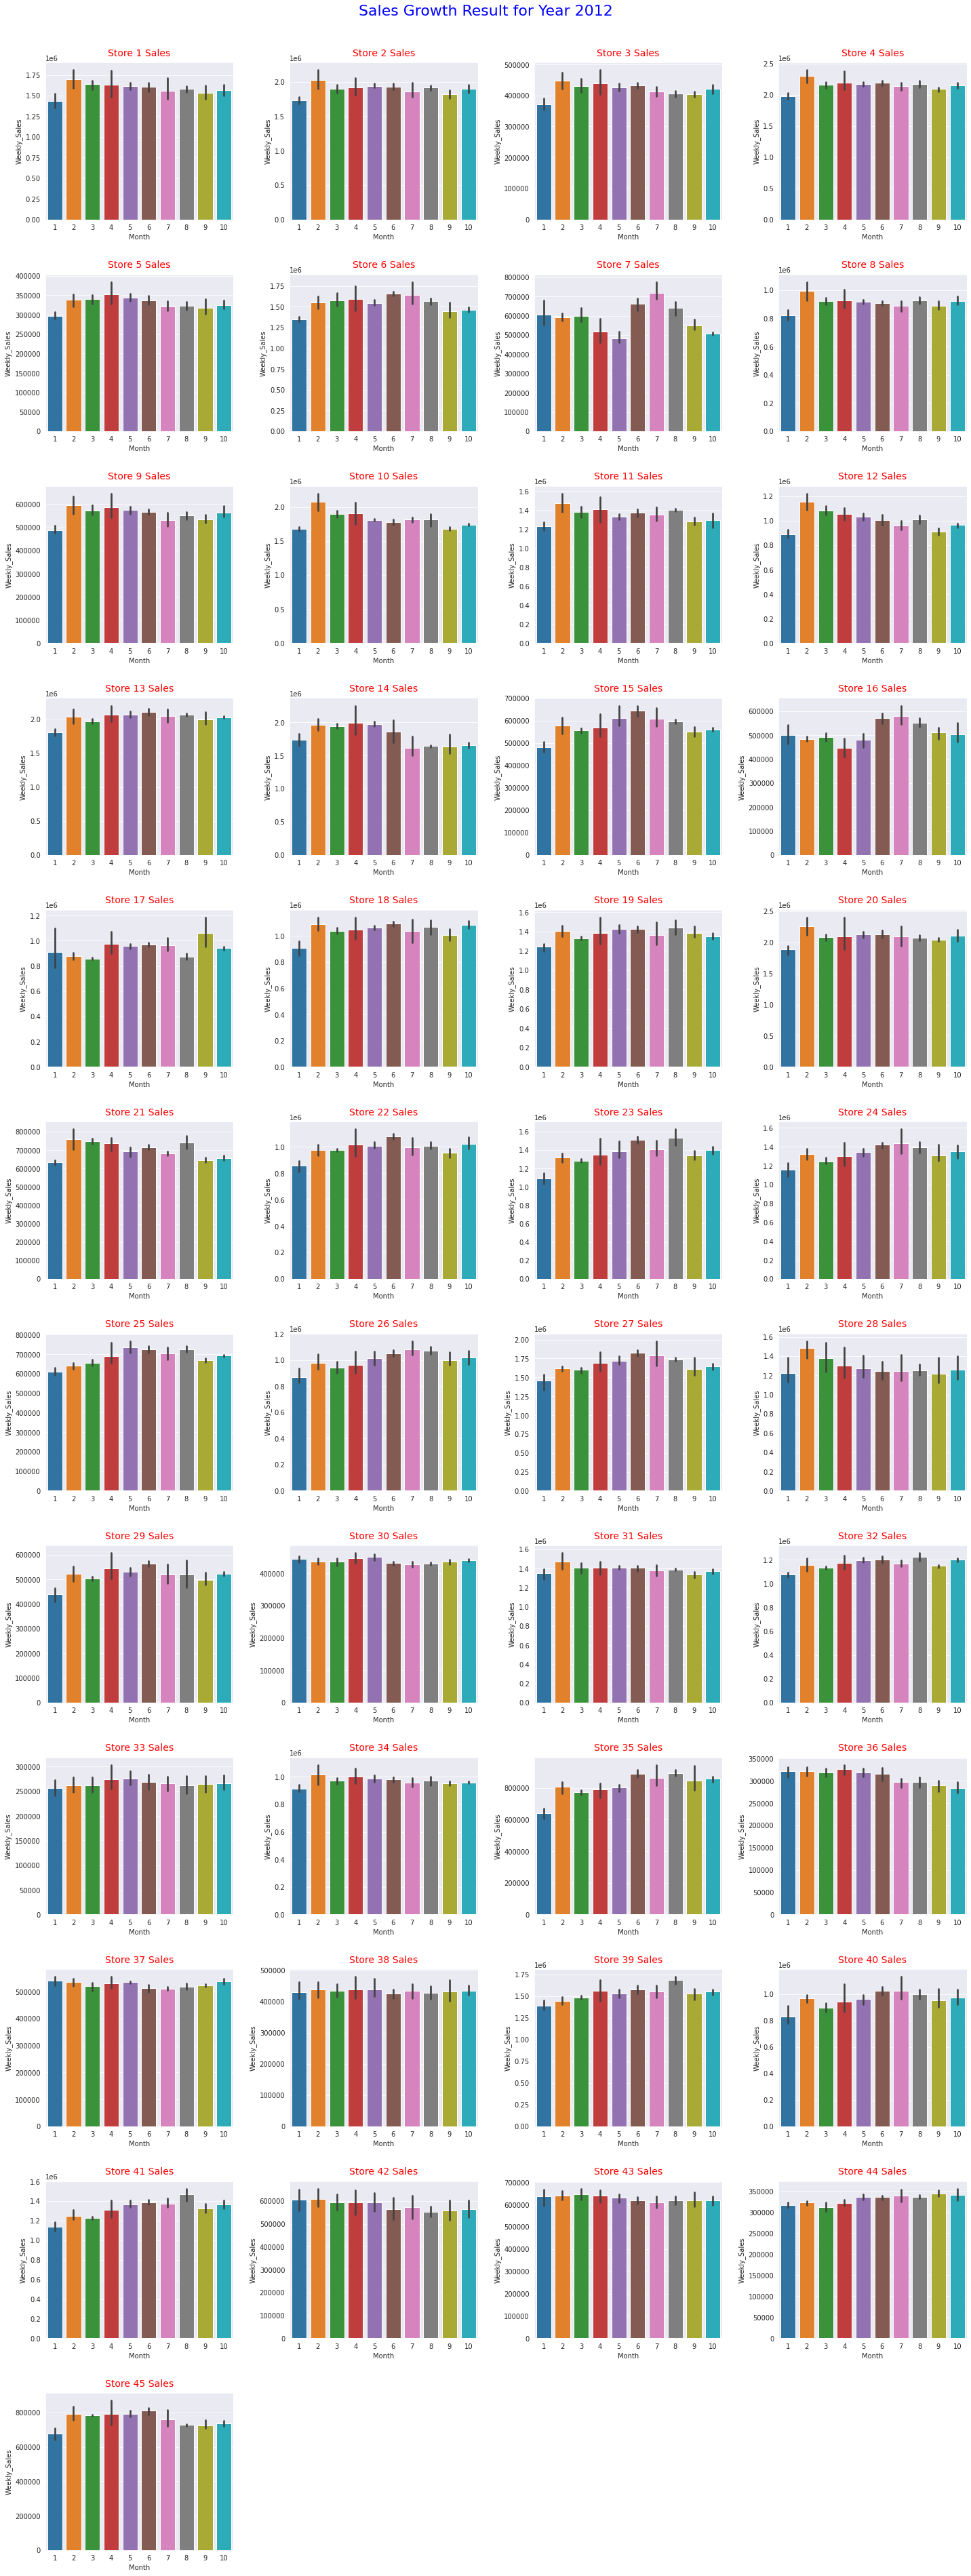

In [26]:
# Sales Growth Results for Year 2012

month_wise_sales(2012)

In [27]:
# Semester(Quarter) Wise Data....Converting months to semesters...

df_walmartSemesterSalesAnalysis = df_walmartSalesAnalysis.copy()
df_walmartSemesterSalesAnalysis['Semester'] = 'Q' + pd.to_datetime(df_walmartSalesAnalysis['Month'], format='%m').dt.quarter.astype(str)

df_walmartSemesterSalesAnalysis.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Semester
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,Q1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,Q1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Q1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Q1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,Q1


In [0]:
# Function to return Semester Wise Sales Growth Results for Year 2010, 2011, 2012

def semester_wise_sales(year):
  all_stores = df_walmartSemesterSalesAnalysis['Store'].unique().tolist()

  number_of_columns= 4
  number_of_rows = len(all_stores)/(number_of_columns)
  fig=plt.figure(figsize=(5*number_of_columns, 5*number_of_rows+3))
  fig.suptitle('Semester wise Sales Growth Result for Year {}'.format(year), fontsize=22, color='blue') 


  for i, store in enumerate(all_stores):
    all_semesters = df_walmartSemesterSalesAnalysis[(df_walmartSemesterSalesAnalysis['Year'] == year) & (df_walmartSemesterSalesAnalysis['Store'] == store)]['Semester'].unique()
    salesGrowthRate = df_walmartSemesterSalesAnalysis[(df_walmartSemesterSalesAnalysis['Year'] == year) & ((df_walmartSemesterSalesAnalysis.Semester.isin(all_semesters))) & (df_walmartSemesterSalesAnalysis['Store'] == store)]

    ax = plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    ax.set_title('Store {} Sales'.format(store), fontsize=14, pad=10, color='red') 
    sns.barplot(x='Semester', y='Weekly_Sales', data=salesGrowthRate, ax=ax)
    
  plt.tight_layout()
  fig.subplots_adjust(wspace=0.3, hspace=0.35, top=0.96, bottom=0.1)

  return ax

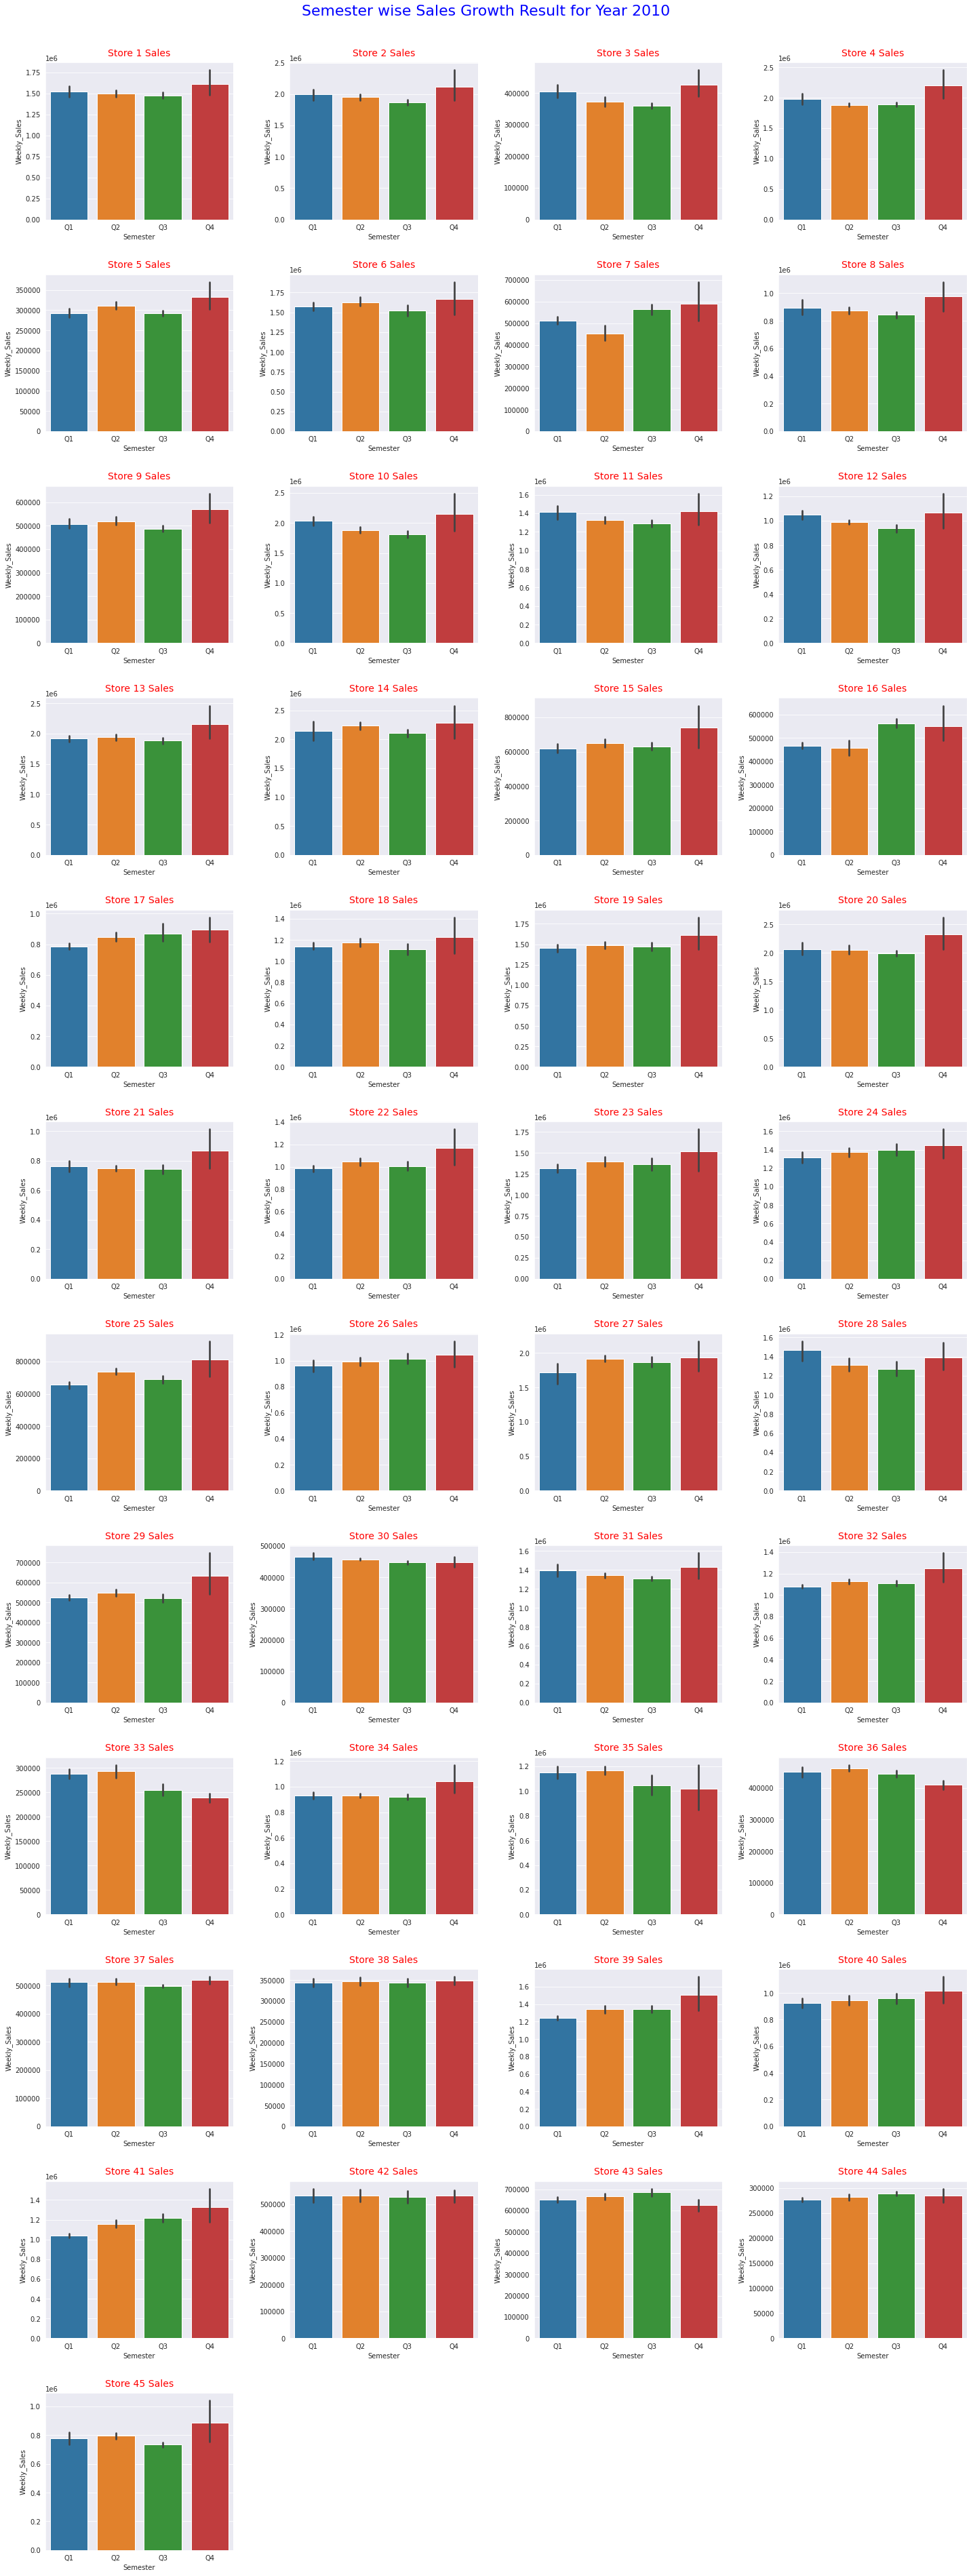

In [29]:
# Semester Wise Sales Growth Results for Year 2010

semester_wise_sales(2010)

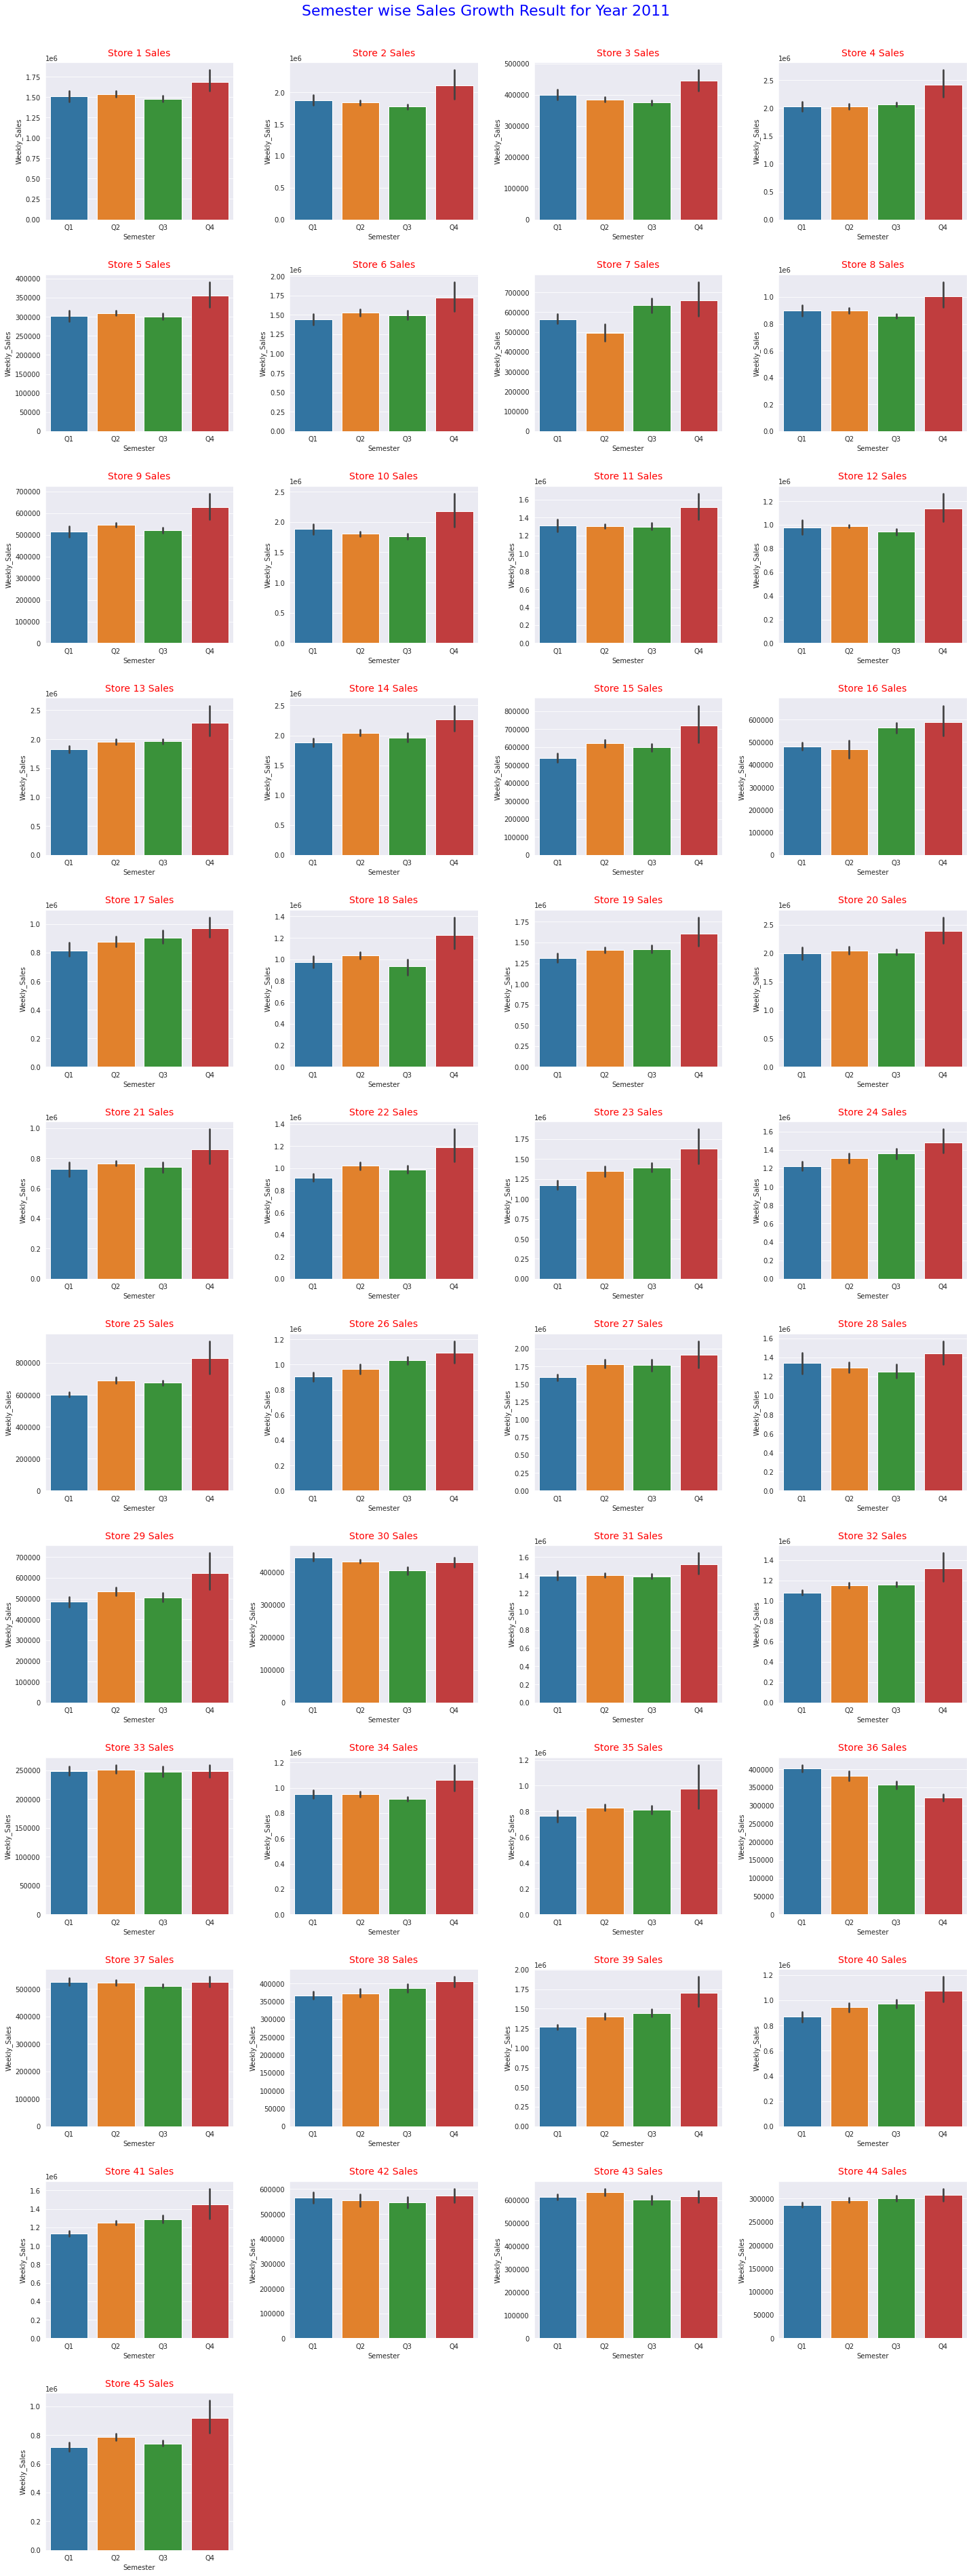

In [30]:
# Semester Wise Sales Growth Results for Year 2011

semester_wise_sales(2011)

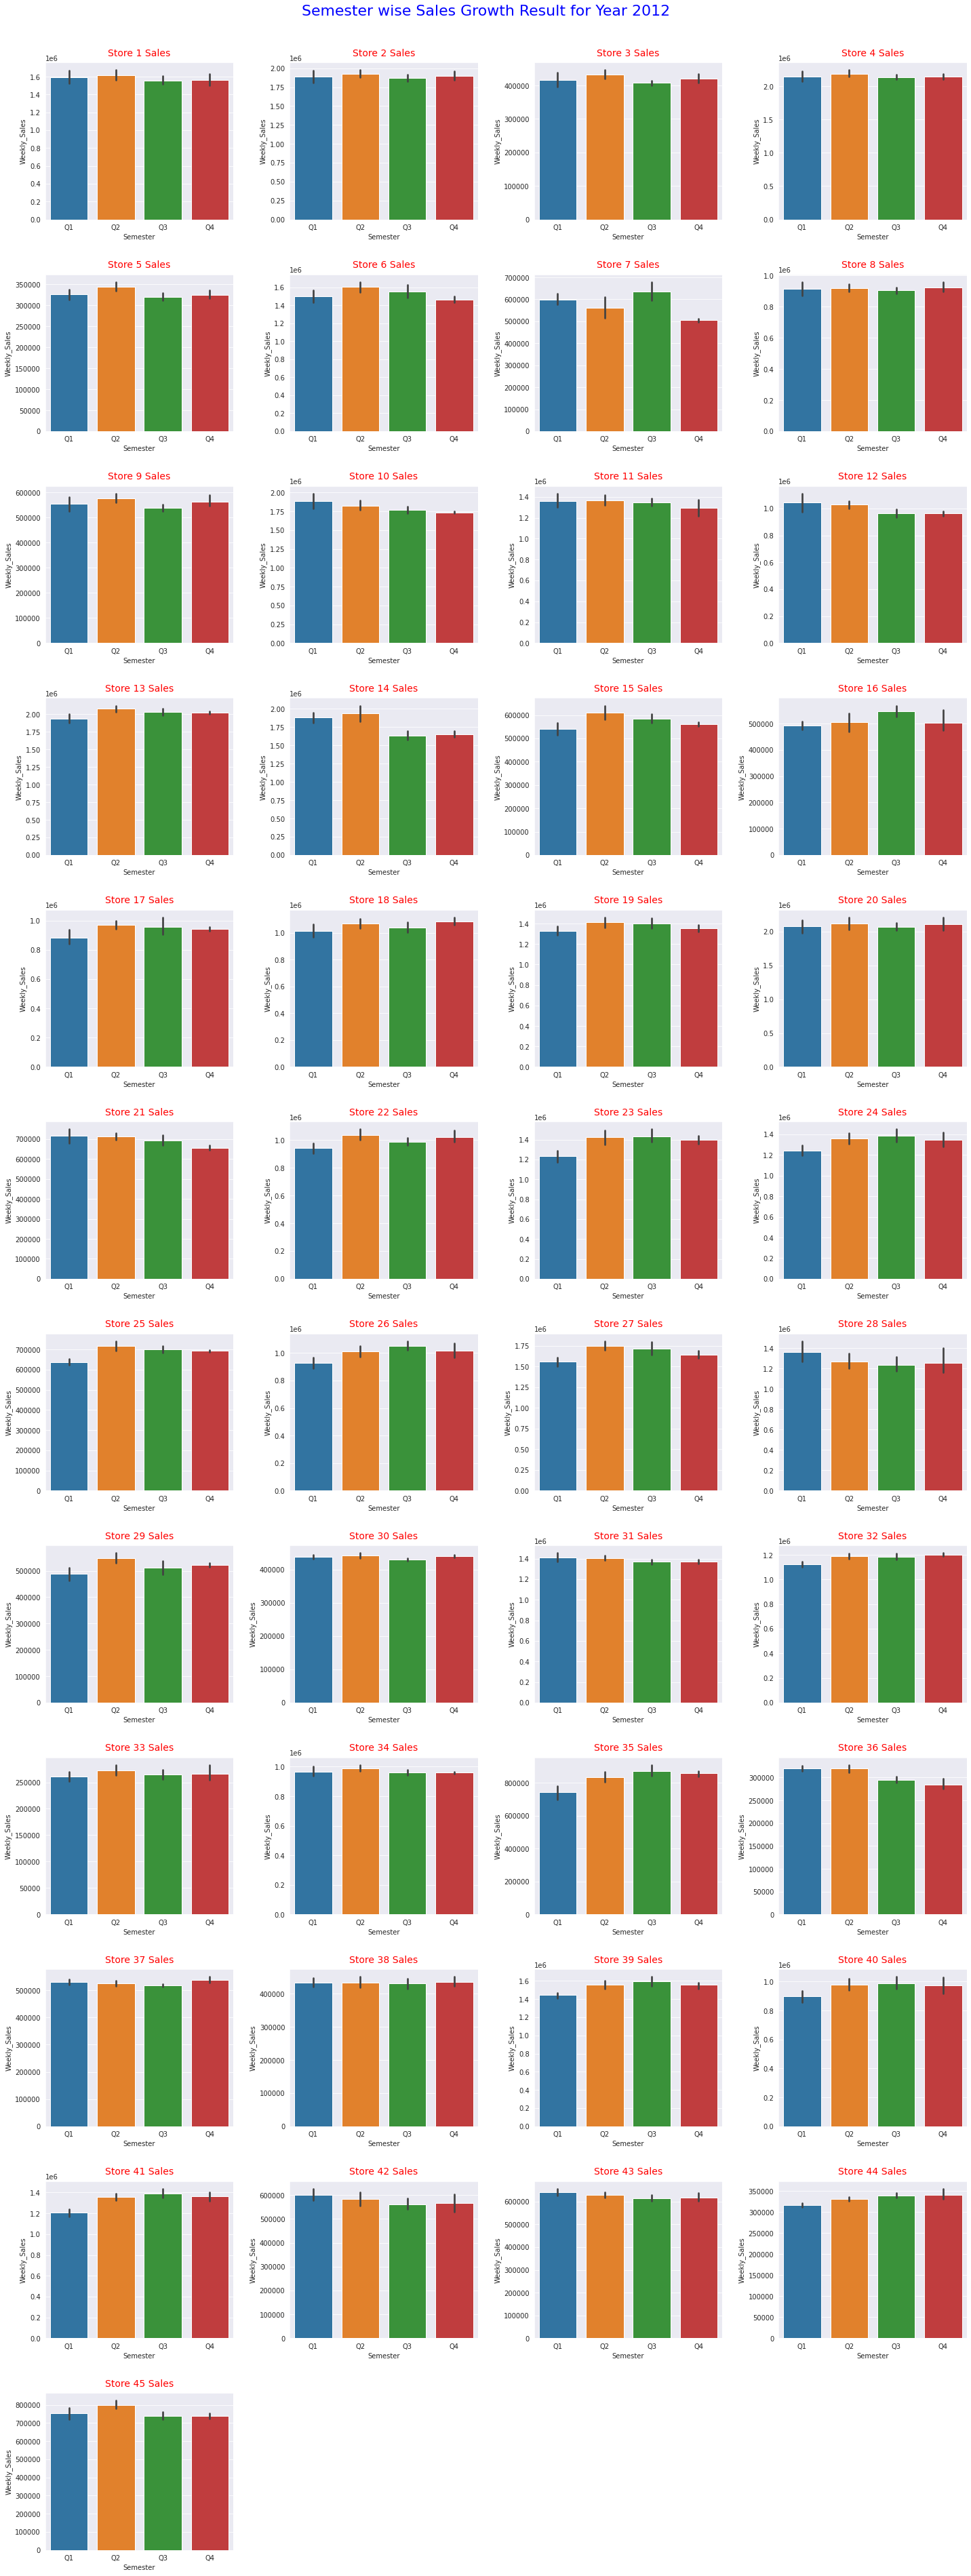

In [31]:
# Semester Wise Sales Growth Results for Year 2012

semester_wise_sales(2012)

# Statistical Model

In [0]:
df_walmartAnalysisModel = df_walmartAnalysis.copy()

# change Dates into Days

df_walmartAnalysisModel['Total_Days'] = pd.Series(delta.days for delta in df_walmartAnalysisModel['Date'].apply(lambda x: pd.Timestamp(2020, 6, 4) - pd.Timestamp(x)).tolist())


df_dummyFeaturesModel = pd.get_dummies(df_walmartAnalysisModel, columns=['Store'])

In [91]:
from sklearn.model_selection import train_test_split

# Unemployment --- feature contribution to Weekly Sales is significant as it will proportionally affect the Store sales.
# On the other hand --- Fuel Price, CPI, Temperature don't contribute much to Weekly_Sales

# Segregate Data into predictors and target variable.

X_features = df_dummyFeaturesModel.drop(['Temperature', 'Fuel_Price', 'CPI', 'Date', 'Weekly_Sales'], axis=1)
Y_target = df_dummyFeaturesModel[['Weekly_Sales']]

# split data into 70% training and 30% test

x_train, x_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4504, 48) (1931, 48) (4504, 1) (1931, 1)


In [92]:
# Fit Linear Regression Model
from sklearn.linear_model import LinearRegression

salesLM = LinearRegression()
salesLM.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
# fitting to linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data.

print('Intercept is- {}\n'.format(salesLM.intercept_[0]))

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, salesLM.coef_[0][idx]))

Intercept is- 1149270.7369196147

The coefficient for Holiday_Flag is 95088.92547989608
The coefficient for Unemployment is -29155.216609666262
The coefficient for Total_Days is 38.218131191138625
The coefficient for Store_1 is 496970.2636162093
The coefficient for Store_2 is 876782.6656928946
The coefficient for Store_3 is -671939.8070541833
The coefficient for Store_4 is 982995.8043979668
The coefficient for Store_5 is -781313.3238668651
The coefficient for Store_6 is 489270.3928597354
The coefficient for Store_7 is -452233.7835237351
The coefficient for Store_8 is -197405.67620568632
The coefficient for Store_9 is -559363.5818881978
The coefficient for Store_10 is 839503.6116042199
The coefficient for Store_11 is 293720.80489837716
The coefficient for Store_12 is 121780.3185847989
The coefficient for Store_13 is 919438.5991144078
The coefficient for Store_14 is 992676.4901073555
The coefficient for Store_15 is -433527.3062994573
The coefficient for Store_16 is -571731.1280186258
The

In [95]:
# model accuracy score

print('So in our model, {}% of the variability in Y can be explained using X'.format(round(salesLM.score(x_test, y_test) * 100, 2)))

So in our model, 92.16% of the variability in Y can be explained using X


In [96]:
# Making Predictions using trained model

y_pred = salesLM.predict(x_test)

# Metric evaluation 

from sklearn import metrics

mae = round(metrics.mean_absolute_error(y_test, y_pred), 2)
mse = round(metrics.mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

print('\n An RMSE {} means that on average the model predicts ${} above or below values of the Weekly Sales Values. i.e {} % below Weekly Sales average.'.format(rmse, rmse, round((rmse/df_walmartAnalysisModel['Weekly_Sales'].mean()) * 100, 2)))

Mean Absolute Error: 90036.62
Mean Squared Error: 24888564719.67
Root Mean Squared Error: 157761.1

 An RMSE 157761.1 means that on average the model predicts $157761.1 above or below values of the Weekly Sales Values. i.e 15.07 % below Weekly Sales average.


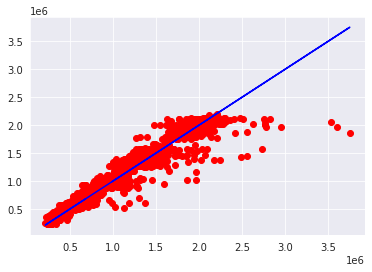

In [97]:
#Performance on the test data sets

plt.plot(y_test, y_pred,'ro')
plt.plot(y_test, y_test,'b-')
plt.show()